In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

# Artykuły

In [2]:
df = pd.read_csv('./nyt-frame.csv', header=0)
data = df.iloc[:,9:]
array = data.values

In [3]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['wonderful' 'face' 'asked' 'figure' 'remind' 'hall' 'photograph'
 'criticized' 'verses' 'soprano' 'memoirs' 'caught' 'purity' 'sea'
 'miniature' 'during' 'interpretation' 'striking' 'tries' 'campus']


In [4]:
pca = PCA()
X_pca = pca.fit_transform(array)

In [5]:
pca_components = pd.DataFrame(pca.components_, columns=header)

In [6]:
pca_first_component = pca_components.iloc[0]

In [7]:
pca_first_component.sort_values(inplace=True)

In [8]:
pca_first_component.iloc[:15]

music       -0.112116
trio        -0.087807
theater     -0.074046
orchestra   -0.069269
composers   -0.058591
opera       -0.055554
theaters    -0.051178
m           -0.049025
program     -0.049001
players     -0.048819
festival    -0.048123
east        -0.047941
y           -0.047912
jersey      -0.046032
symphony    -0.044931
Name: 0, dtype: float64

**Największe wartości pierwszego komponentu wiodącego odpowiadają słową powiązanym z muzyką.**

In [9]:
pca_first_component.iloc[-15:]

me           0.063793
he           0.065310
mrs          0.065621
im           0.068574
paintings    0.069885
process      0.071196
painting     0.087887
my           0.094325
cooper       0.103009
mother       0.106872
said         0.133606
i            0.150283
ms           0.202113
her          0.245293
she          0.261274
Name: 0, dtype: float64

**Najmniejsze wartości pierwszego komponentu wiodącego odpowiadają prefiksą/sufiksą**

In [10]:
pca_second_component = pca_components.iloc[1]

In [11]:
pca_second_component.sort_values(inplace=True)

In [12]:
pca_second_component.iloc[:15]

art          -0.154317
museum       -0.120899
images       -0.095227
artists      -0.092635
donations    -0.077658
museums      -0.075395
painting     -0.074020
tax          -0.072269
paintings    -0.065643
sculpture    -0.060353
gallery      -0.055159
sculptures   -0.051479
painted      -0.050138
white        -0.049667
service      -0.046664
Name: 1, dtype: float64

**W największysz wartościach drugiego komponentu przebijają się słowa powiązane z sztuką**

In [13]:
pca_second_component.iloc[-15:]

vocal         0.067588
orchestra     0.067603
songs         0.069232
musical       0.070708
music         0.072345
festival      0.073009
production    0.074158
sang          0.074653
hour          0.080759
i             0.081202
ms            0.124470
opera         0.129926
theater       0.162391
she           0.213074
her           0.220785
Name: 1, dtype: float64

**W najmniejszy wartościach drugiego komponentu dostrzegamy podobieństwo z wartościami największymi pierwszego komponentu tj. słowa powiązane z muzyką**

In [14]:
pca_two_components = PCA(n_components=2)
X_pca = pca_two_components.fit_transform(array)

In [15]:
reds = df.loc[df['class.labels'] == 'art'].index.values
blues = df.loc[df['class.labels'] == 'music'].index.values

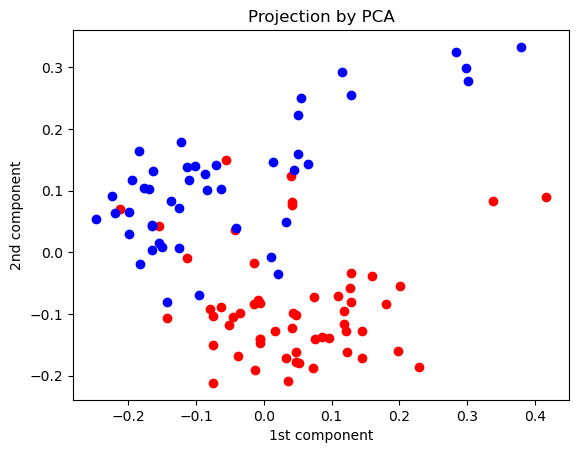

In [16]:
plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

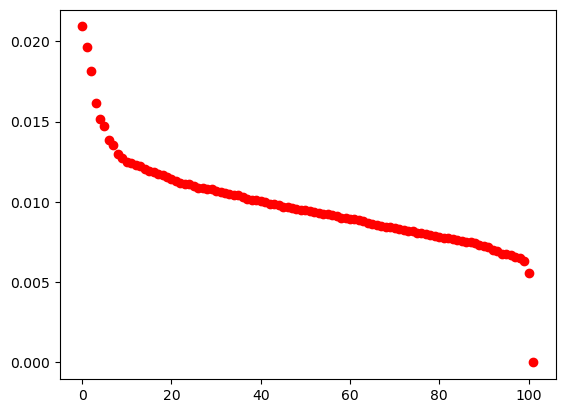

In [17]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()

In [18]:
print(sum(variance_ratio[0:10]))

0.15773478029003493


**10 komponetnów zachowuje około 15/16% wariancji**

# Samochody

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
df = pd.read_csv('04cars-data.csv')

In [21]:
numeric_data = df.iloc[:, -11:]

In [22]:
scaler = StandardScaler()

numeric_data_scaled = scaler.fit_transform(numeric_data)

In [23]:
pca = PCA()

numeric_data_scaled_pca = pca.fit_transform(numeric_data_scaled)

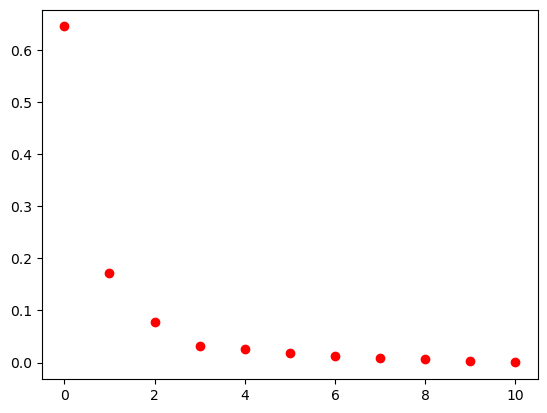

redukcja do 2: 0.8171421089701892
redukcja do 3: 0.8943901348942342


In [24]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(f"redukcja do 2: {sum(variance_ratio[0:2])}")
print(f"redukcja do 3: {sum(variance_ratio[0:3])}")

**2 komponenty zachowują około 82% wariancji\
  3 komponenty zachowują około 89% wariancji**

In [25]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
attributes = numeric_data.columns
print('Attribute, PC1, PC2')
for i in range(0,pc1.shape[0]):
    print(attributes[i] + ':' + repr(pc1[i]) + ':' + repr(pc2[i]))

Attribute, PC1, PC2
Retail Price:-0.2637504434440344:0.46850869750253893
Dealer Cost:-0.26231863875309513:0.47014658513822627
Engine Size (l):-0.3470804920252009:-0.015347186463713684
Cyl:-0.33418875762863715:0.07803201087501874
HP:-0.31860225848402934:0.2922134761391823
City MPG:0.3104817267323129:-0.0033659357616590904
Hwy MPG:0.3065886385804443:-0.01096446014534855
Weight:-0.336329366940488:-0.16746357154787034
Wheel Base:-0.26621003357105416:-0.41817710695920435
Len:-0.25679018767068235:-0.40841138066875504
Width:-0.29605459141706114:-0.3128913501625075


**Największe wartości komponentu pierwszego odpowiadają zużyciu paliwa\
Najmniejsze wartości komponentu pierwszego odpowiadają pojemności silnika\
Największe wartości komponentu drugiego odpowiadają liczbie cylindrów\
Najmniejsze wartości komponentu drugiego rozstawowi osi**

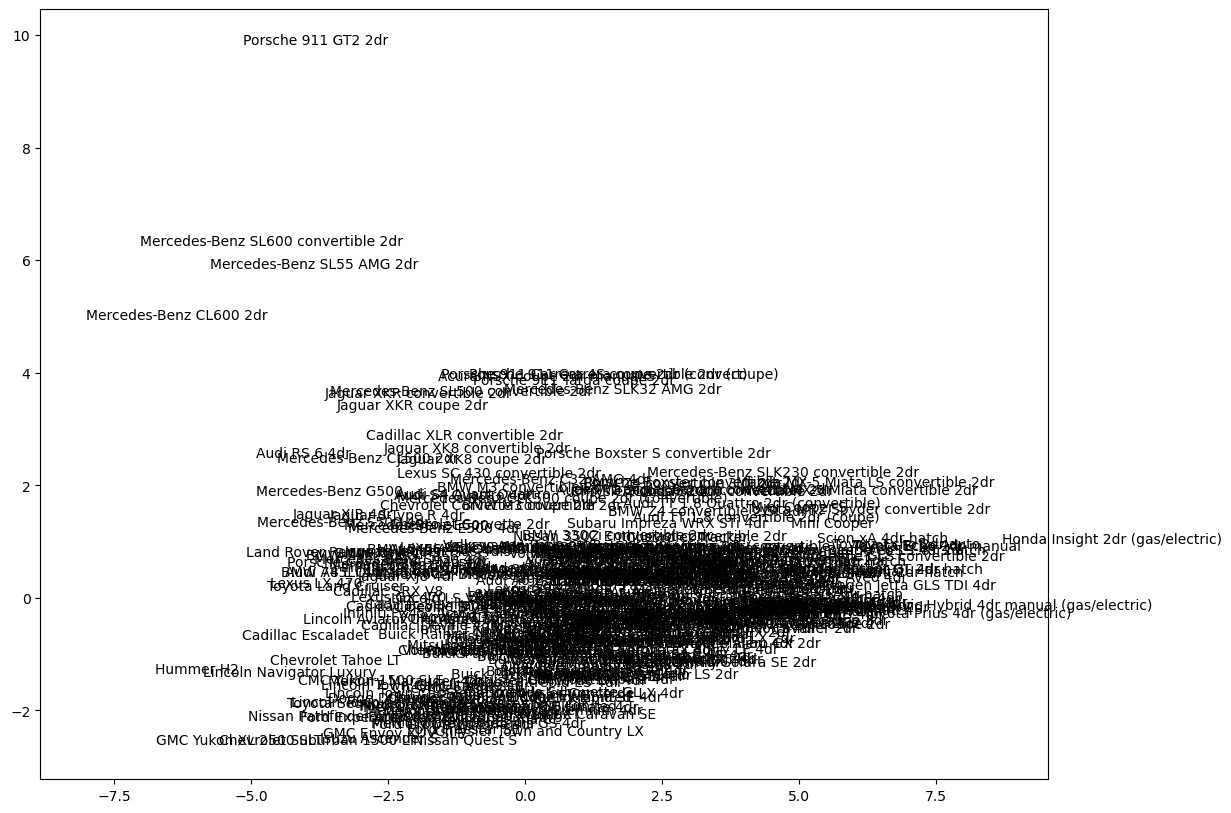

In [26]:
fig, ax = plt.subplots(figsize=(13,10))
ax.scatter(numeric_data_scaled_pca[:, 0], numeric_data_scaled_pca[:, 1], alpha=0)
labels_cars = df.iloc[:, 0].values

for i in range(len(labels_cars)):
    ax.annotate(labels_cars[i], (numeric_data_scaled_pca[:, 0][i], numeric_data_scaled_pca[:, 1][i]))


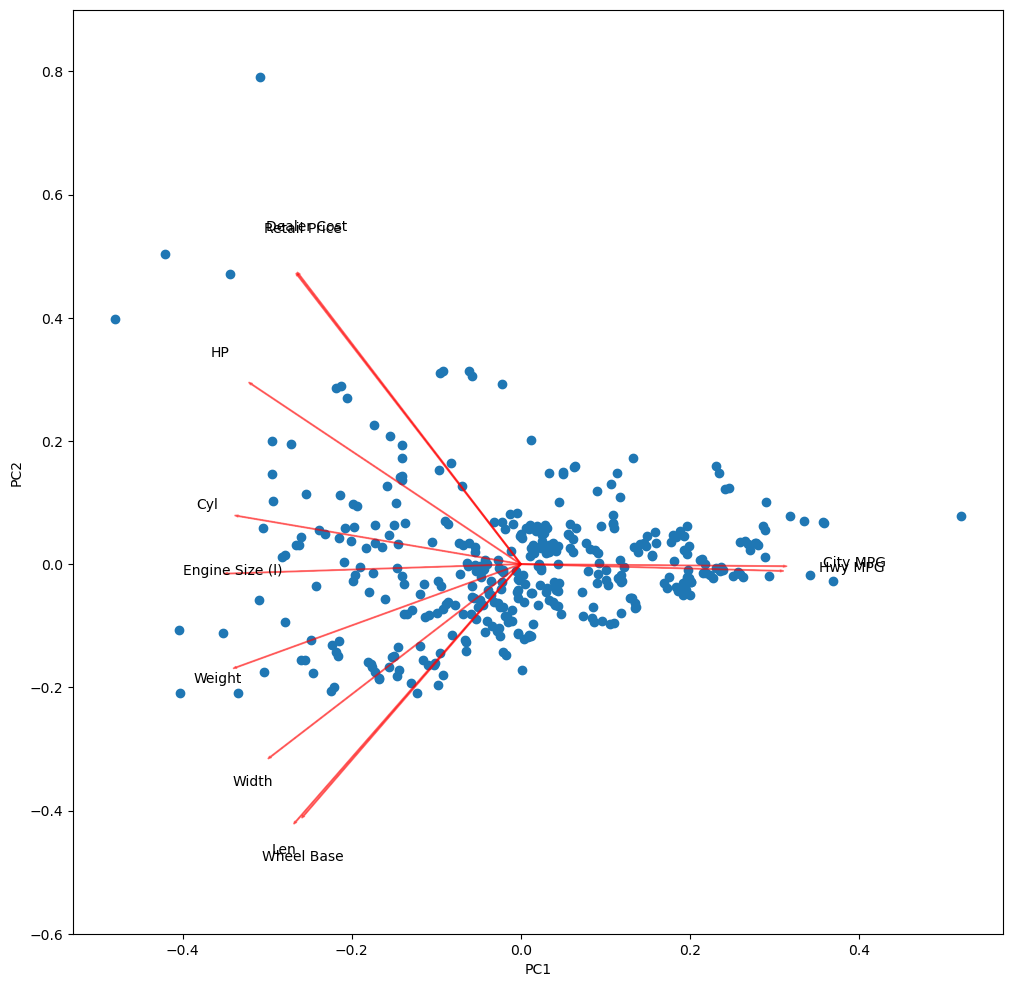

In [27]:
%matplotlib inline
def myplot(score, coeff, labels=None):
    plt.figure(figsize=(12, 12))
    plt.xlabel(f'PC{1}')
    plt.ylabel(f'PC{2}')
    xs = score[:, 0]
    ys = score[:, 1]
    scale_x = 1.0 / (xs.max() - xs.min())
    scale_y = 1.0 / (ys.max() - ys.min())
    n = coeff.shape[0]
    plt.scatter(xs * scale_x, ys * scale_y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='red', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, 'var'+str(i+1))
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i])
myplot(numeric_data_scaled_pca[:, 0:2], np.transpose(pca.components_[0:2, :]), numeric_data.columns)
axes = plt.gca()
axes.set_ylim([-.6 , .9])
plt.show()


**Na wykresie możemy zauważyć rozkład samochodów wzdłuż pierwszych komponentów. "Miotła" przedstawiona na wykresie wskazuje nam jakie cechy danych samochodów "ciągną" dany model w poszczególną stroną. W ten sposób możemy zauważyć, że samochody małe, miejskie leżą w prawej cześci wykresu, samochody duże/amerykańskie znajdują się z lewej dolnej strony wykresu ponieważ są tanie w przeciwieństwie do lewej górnej cześci wykresu w której umiejscowione są topowe/luksoswe samochody jak porsche 911 (możemy to zaobserwować na poprzednim wykresie z naniesionymi nazwami modelów samochodów)**

# Twarze

In [28]:
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [29]:
lfw_people = fetch_lfw_people(min_faces_per_person=50)

X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, test_size=0.3, random_state=42)

In [30]:
pca = PCA(n_components=100, whiten=True)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

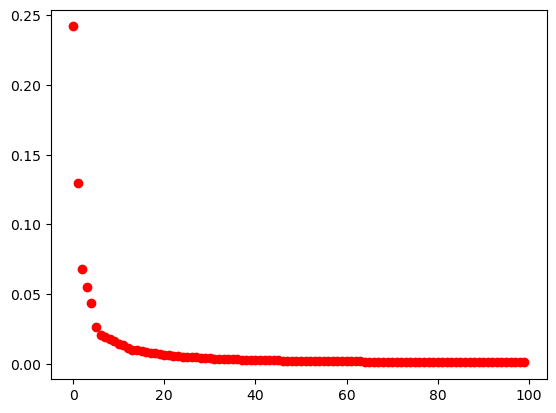

In [31]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(1024, 512, 256), max_iter=500)
mlp.fit(X_train_pca, y_train)

y_pred_mlp = mlp.predict(X_test_pca)

print("Raport klasyfikacji dla MLP:\n", classification_report(y_test, y_pred_mlp))

Raport klasyfikacji dla MLP:
               precision    recall  f1-score   support

           0       0.93      0.62      0.74        21
           1       0.87      0.94      0.90        77
           2       0.62      0.72      0.67        32
           3       0.89      0.88      0.89       162
           4       0.81      0.83      0.82        30
           5       0.76      0.62      0.68        21
           6       0.92      0.71      0.80        17
           7       0.82      0.82      0.82        17
           8       0.84      0.84      0.84        19
           9       0.73      0.85      0.79        13
          10       0.83      0.77      0.80        13
          11       0.78      0.83      0.80        46

    accuracy                           0.83       468
   macro avg       0.82      0.79      0.80       468
weighted avg       0.84      0.83      0.83       468



In [33]:
svm = SVC(kernel='linear', C=0.01)
svm.fit(X_train_pca, y_train)

y_pred_svm = svm.predict(X_test_pca)

print("Raport klasyfikacji dla SVM:\n", classification_report(y_test, y_pred_svm))

Raport klasyfikacji dla SVM:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65        21
           1       0.81      0.87      0.84        77
           2       0.56      0.62      0.59        32
           3       0.76      0.90      0.82       162
           4       0.76      0.73      0.75        30
           5       0.92      0.57      0.71        21
           6       0.88      0.41      0.56        17
           7       0.86      0.71      0.77        17
           8       0.92      0.58      0.71        19
           9       1.00      0.85      0.92        13
          10       0.90      0.69      0.78        13
          11       0.85      0.76      0.80        46

    accuracy                           0.78       468
   macro avg       0.82      0.69      0.74       468
weighted avg       0.79      0.78      0.77       468



In [34]:
pca = PCA(n_components=50, whiten=True)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=(1024, 512, 256), max_iter=500)
mlp.fit(X_train_pca, y_train)

y_pred_mlp = mlp.predict(X_test_pca)

print("Raport klasyfikacji dla MLP:\n", classification_report(y_test, y_pred_mlp))

Raport klasyfikacji dla MLP:
               precision    recall  f1-score   support

           0       0.62      0.71      0.67        21
           1       0.89      0.88      0.89        77
           2       0.66      0.66      0.66        32
           3       0.87      0.88      0.87       162
           4       0.57      0.53      0.55        30
           5       0.76      0.76      0.76        21
           6       0.77      0.59      0.67        17
           7       0.71      0.88      0.79        17
           8       0.76      0.84      0.80        19
           9       0.93      1.00      0.96        13
          10       0.90      0.69      0.78        13
          11       0.73      0.72      0.73        46

    accuracy                           0.80       468
   macro avg       0.77      0.76      0.76       468
weighted avg       0.80      0.80      0.80       468



In [36]:
svm = SVC(kernel='linear', C=0.01)
svm.fit(X_train_pca, y_train)

y_pred_svm = svm.predict(X_test_pca)

print("Raport klasyfikacji dla SVM:\n", classification_report(y_test, y_pred_svm))

Raport klasyfikacji dla SVM:
               precision    recall  f1-score   support

           0       0.65      0.62      0.63        21
           1       0.75      0.84      0.79        77
           2       0.58      0.56      0.57        32
           3       0.71      0.93      0.81       162
           4       0.45      0.47      0.46        30
           5       1.00      0.48      0.65        21
           6       1.00      0.29      0.45        17
           7       0.77      0.59      0.67        17
           8       1.00      0.05      0.10        19
           9       1.00      0.77      0.87        13
          10       1.00      0.62      0.76        13
          11       0.79      0.72      0.75        46

    accuracy                           0.72       468
   macro avg       0.81      0.58      0.63       468
weighted avg       0.75      0.72      0.70       468



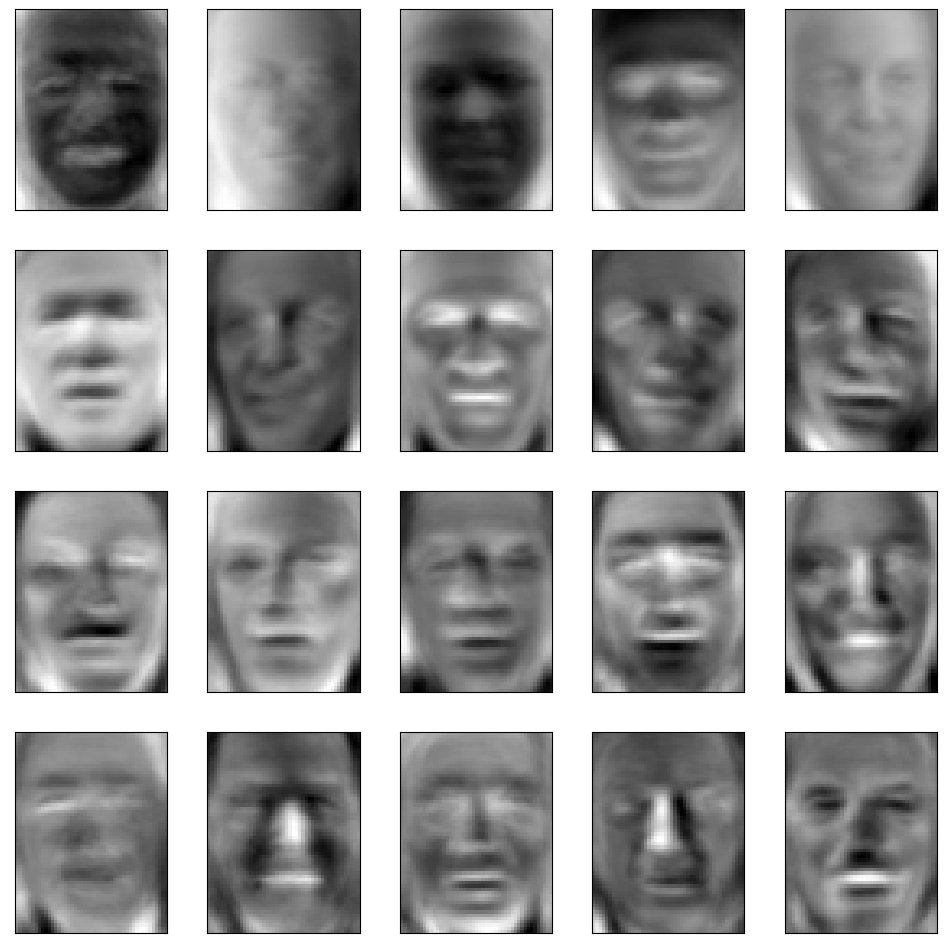

In [37]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(pca.components_[:20][i].reshape(62, 47), cmap='gray')
    plt.xticks(())
    plt.yticks(())
plt.show()

**Działanie eigenfaces ukazują nam grupy wydzielone ze względu na cechy twarzy takie jak: wielkość nosa, kształt twarzy oraz kości policzkowych, wielkości oczodołów, itd. W ten sposób np. w ostanim wierszu i przedostatniej kolumnie widzimy twarz z wyraźnie owalnym kształtem oraz dużym nosem i sporym czołem**

# Kernel PCA

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

In [57]:
def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [39]:
def generate_points_on_sphere(n, r):
    u = np.random.rand(n)
    v = np.random.rand(n)

    theta = 2 * np.pi * u
    phi = np.arccos(2 * v - 1)

    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)

    return np.column_stack((x, y, z))

In [40]:
small_sphere = generate_points_on_sphere(300, 15)
big_sphere = generate_points_on_sphere(300, 40)

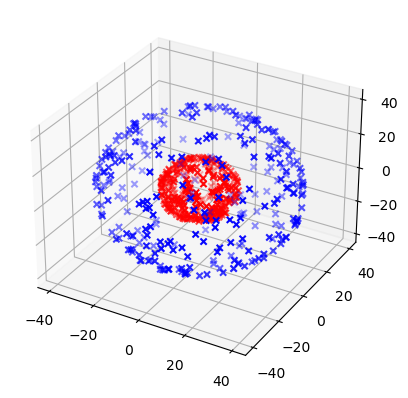

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(small_sphere[:, 0], small_sphere[:, 1], small_sphere[:, 2], c='red', marker='x')
ax.scatter(big_sphere[:, 0], big_sphere[:, 1],big_sphere[:, 2], c='blue', marker='x')

plt.show()

In [42]:
data_sphere = np.vstack((small_sphere, big_sphere))

pca = PCA()
pca.fit(data_sphere)

small_sphere_pca = pca.transform(small_sphere)
big_sphere_pca = pca.transform(big_sphere)

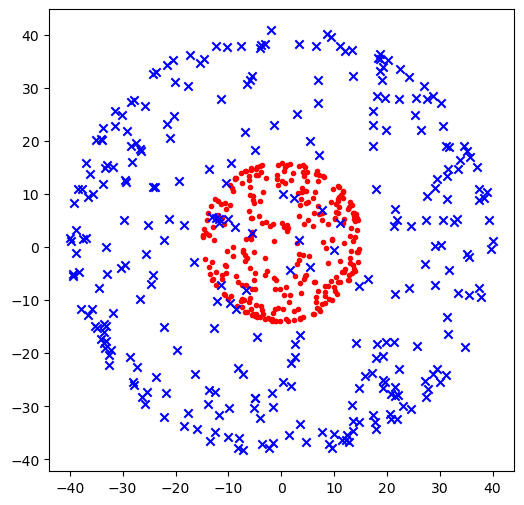

In [43]:
plt.figure(figsize=(6, 6))
plt.scatter(small_sphere_pca[:, 0], small_sphere_pca[:, 1], c = 'r', marker='.')
plt.scatter(big_sphere_pca[:, 0], big_sphere_pca[:, 1], c = 'b', marker='x')
plt.show()

In [44]:
kpca = KernelPCA(kernel='rbf')

kpca.fit(data_sphere)

small_sphere_kpca = kpca.transform(small_sphere)
big_sphere_kpca = kpca.transform(big_sphere)

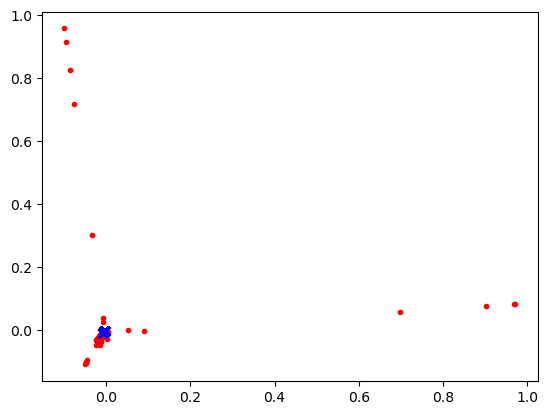

In [45]:
plt.figure()
plt.scatter(small_sphere_kpca[:, 0], small_sphere_kpca[:, 1], c = 'r', marker='.')
plt.scatter(big_sphere_kpca[:, 0], big_sphere_kpca[:, 1], c = 'b', marker='x')
plt.show()

In [47]:
kpca = KernelPCA(kernel='rbf', n_components=100)

kpca.fit(X_train)

X_train_kpca = kpca.transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(1024, 512, 256), max_iter=500)
mlp.fit(X_train_kpca, y_train)

y_pred_mlp = mlp.predict(X_test_kpca)

print("Raport klasyfikacji dla MLP:\n", classification_report(y_test, y_pred_mlp))

Raport klasyfikacji dla MLP:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62        21
           1       0.82      0.84      0.83        77
           2       0.63      0.75      0.69        32
           3       0.92      0.85      0.88       162
           4       0.69      0.73      0.71        30
           5       0.60      0.57      0.59        21
           6       0.57      0.47      0.52        17
           7       0.71      0.71      0.71        17
           8       0.65      0.68      0.67        19
           9       0.67      0.77      0.71        13
          10       0.73      0.85      0.79        13
          11       0.69      0.76      0.72        46

    accuracy                           0.77       468
   macro avg       0.70      0.71      0.70       468
weighted avg       0.78      0.77      0.77       468



In [58]:
svm = SVC(kernel='linear', C=0.01)
svm.fit(X_train_kpca, y_train)

y_pred_svm = svm.predict(X_test_kpca)

print("Raport klasyfikacji dla SVM:\n", classification_report(y_test, y_pred_svm))

Raport klasyfikacji dla SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        32
           3       0.35      1.00      0.51       162
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00        13
          11       0.00      0.00      0.00        46

    accuracy                           0.35       468
   macro avg       0.03      0.08      0.04       468
weighted avg       0.12      0.35      0.18       468



In [50]:
kpca = KernelPCA(kernel='rbf', n_components=50)

kpca.fit(X_train)

X_train_kpca = kpca.transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [51]:
mlp = MLPClassifier(hidden_layer_sizes=(1024, 512, 256), max_iter=500)
mlp.fit(X_train_kpca, y_train)

y_pred_mlp = mlp.predict(X_test_kpca)

print("Raport klasyfikacji dla MLP:\n", classification_report(y_test, y_pred_mlp))

Raport klasyfikacji dla MLP:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70        21
           1       0.88      0.86      0.87        77
           2       0.60      0.66      0.63        32
           3       0.89      0.85      0.87       162
           4       0.66      0.70      0.68        30
           5       0.71      0.57      0.63        21
           6       0.77      0.59      0.67        17
           7       0.68      0.76      0.72        17
           8       0.73      0.84      0.78        19
           9       0.92      0.85      0.88        13
          10       0.83      0.77      0.80        13
          11       0.63      0.78      0.70        46

    accuracy                           0.79       468
   macro avg       0.75      0.74      0.74       468
weighted avg       0.79      0.79      0.79       468



In [59]:
svm = SVC(kernel='linear', C=0.01)
svm.fit(X_train_kpca, y_train)

y_pred_svm = svm.predict(X_test_kpca)

print("Raport klasyfikacji dla SVM:\n", classification_report(y_test, y_pred_svm))

Raport klasyfikacji dla SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        32
           3       0.35      1.00      0.51       162
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00        13
          11       0.00      0.00      0.00        46

    accuracy                           0.35       468
   macro avg       0.03      0.08      0.04       468
weighted avg       0.12      0.35      0.18       468



**Wyniki gorsze względem klasycznego pca szczególnie svm nie radzi sobie z kernel pca. SVM z jądrem PCA może działać gorzej niż PCA dla danych liniowo separowalnych ze względu na dodatkowe przekształcenie danych i większą liczbę hiperparametrów do dopasowania. Dla danych liniowo separowalnych zwykle wystarczy zastosowanie standardowego PCA, który jest prostszy i skuteczniejszy dla takiego typu danych.**